In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
rain = pd.read_excel(r"rainfall.xlsx")
temp = pd.read_excel(r"temperature.xlsx")

EDA for Rain 

In [22]:
rain.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000
mean,1959.263749,18.897059,21.619273,27.455571,43.054878,85.339168,230.003467,346.861119,289.650287,197.209613,95.234696,39.381133,18.948446,1413.654711,40.516332,155.849617,1063.724486,153.564275
std,33.718328,33.762537,35.737186,47.020862,68.161540,122.247914,234.143644,268.767216,188.513681,135.457305,99.052523,67.564332,42.984516,905.943375,59.297870,201.248185,706.614786,166.121340
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.200000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.600000,70.800000,175.675000,155.550000,100.400000,14.600000,0.600000,0.100000,804.500000,4.000000,24.125000,573.925000,34.100000
50%,1959.000000,5.900000,6.500000,7.900000,15.400000,36.750000,138.750000,284.900000,258.300000,173.600000,65.300000,9.400000,3.000000,1122.250000,18.950000,74.900000,880.600000,98.100000
75%,1988.000000,21.950000,26.600000,31.400000,49.500000,97.075000,305.050000,418.275000,377.650000,266.125000,148.100000,45.475000,17.500000,1648.125000,50.175000,197.000000,1286.175000,212.075000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,583.000000,617.500000,6331.100000,699.500000,1745.800000,4537.000000,1252.500000


In [23]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4182 non-null   object 
 1   YEAR         4182 non-null   int64  
 2   JAN          4182 non-null   float64
 3   FEB          4182 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4182 non-null   float64
 6   MAY          4182 non-null   float64
 7   JUN          4182 non-null   float64
 8   JUL          4182 non-null   float64
 9   AUG          4182 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4182 non-null   float64
 12  NOV          4182 non-null   float64
 13  DEC          4182 non-null   float64
 14  ANNUAL       4182 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4182 non-null   float64
 17  JJAS         4182 non-null   float64
 18  OND          4182 non-null   float64
dtypes: flo

In [24]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     119 non-null    int64  
 1   JAN      119 non-null    float64
 2   FEB      119 non-null    float64
 3   MAR      119 non-null    float64
 4   APR      119 non-null    float64
 5   MAY      119 non-null    float64
 6   JUN      119 non-null    float64
 7   JUL      119 non-null    float64
 8   AUG      119 non-null    float64
 9   SEP      119 non-null    float64
 10  OCT      119 non-null    float64
 11  NOV      119 non-null    float64
 12  DEC      119 non-null    float64
 13  ANNUAL   119 non-null    float64
 14  JAN-FEB  119 non-null    float64
 15  MAR-MAY  119 non-null    float64
 16  JUN-SEP  119 non-null    float64
 17  OCT-DEC  119 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.9 KB


In [25]:
temp.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1960.000000,18.445714,20.172437,23.468319,26.550000,28.415714,28.328151,27.386891,26.954958,26.363697,24.768571,21.801345,19.193361,24.305630,19.287899,26.120840,27.253613,21.907731
std,34.496377,0.632033,0.933109,0.897558,0.794085,0.677908,0.504184,0.370038,0.364491,0.417119,0.594498,0.685748,0.649022,0.480026,0.703542,0.656726,0.350534,0.584820
min,1901.000000,17.250000,17.790000,21.780000,24.840000,26.970000,27.330000,26.480000,26.210000,25.470000,23.520000,20.590000,17.980000,23.560000,17.580000,24.890000,26.530000,20.960000
25%,1930.500000,18.070000,19.490000,22.855000,26.015000,27.960000,28.020000,27.155000,26.735000,26.125000,24.400000,21.320000,18.780000,24.005000,18.850000,25.690000,27.065000,21.485000
50%,1960.000000,18.350000,20.000000,23.340000,26.540000,28.350000,28.250000,27.350000,26.900000,26.320000,24.670000,21.730000,19.200000,24.150000,19.120000,26.040000,27.190000,21.830000
75%,1989.500000,18.770000,20.650000,23.955000,26.935000,28.820000,28.600000,27.535000,27.165000,26.520000,24.930000,22.165000,19.550000,24.505000,19.625000,26.445000,27.360000,22.205000
max,2019.000000,20.920000,23.580000,26.610000,29.560000,30.780000,30.260000,28.650000,28.170000,28.110000,27.240000,23.930000,21.890000,26.450000,22.250000,28.860000,28.600000,24.210000


In [26]:
def temp_predict():
    data = temp[['YEAR', 'ANNUAL']]
    print(data)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    from sklearn.model_selection import train_test_split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

    reg = linear_model.LinearRegression()
    reg.fit(X,y)
    
    def viz_linear():
        plt.scatter(X_train, y_train, color = 'red')
        plt.plot(X_train, reg.predict(X_train), color = 'blue')
        plt.xlabel('Year')
        plt.title('Temperature from 1901-2019')
        plt.ylabel('Annual Temperature')
        plt.show()

    poly_reg = PolynomialFeatures(degree=4)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = linear_model.LinearRegression()
    pol_reg.fit(X_poly, y)

    # Visualizing the Polymonial Regression results
    def viz_polymonial():
        plt.scatter(X, y, color='orange')
        plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='black')
        plt.title('Temperature from 1901-2019')
        plt.xlabel('Year')
        plt.ylabel('Annual Temperature')
        plt.show()
        return
    viz_linear()
    viz_polymonial()
    
    print(pol_reg.predict(poly_reg.fit_transform([[test]])))
    print("R2 square of linear regression is {}".format(r2_score(y, reg.predict(X))))
    print("R2 square of polynomial regression is {}".format(r2_score(y, pol_reg.predict(X_poly))))

In [27]:
def rain_predict():
    print('You have the option to choose from the following subdivision keywords: \n')
    for i in rain['SUBDIVISION'].unique():
        print(i)

    subd = str(input('Enter the subdivision for which data is required: '))
    dt_rain = rain.loc[rain['SUBDIVISION'] == subd, ['YEAR', 'ANNUAL']]
    dt_rain

    X1 = dt_rain.iloc[:, :-1].values
    y1 = dt_rain.iloc[:, -1].values
    from sklearn.model_selection import train_test_split 
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15, random_state=0)

    reg1 = linear_model.LinearRegression()
    reg1.fit(X1,y1)
    
    def viz_linear1():
        plt.scatter(X1_train, y1_train, color = 'red')
        plt.plot(X1_train, reg1.predict(X1_train), color = 'blue')
        plt.xlabel('Year')
        plt.ylabel('Annual Rainfall')
        plt.show()

    poly_reg1 = PolynomialFeatures(degree=4)
    X1_poly = poly_reg1.fit_transform(X1)
    pol_reg1 = linear_model.LinearRegression()
    pol_reg1.fit(X1_poly, y1)

    # Visualizing the Polymonial Regression results
    def viz_polymonial1():
        plt.scatter(X1, y1, color='orange')
        plt.plot(X1, pol_reg1.predict(poly_reg1.fit_transform(X1)), color='black')
        plt.title('Temperature from 1901-2019')
        plt.xlabel('Year')
        plt.ylabel('Annual Rainfall')
        plt.show()
        return
    viz_linear1()
    viz_polymonial1()
    test_rain = int(input("Enter the year for which you want the predicted value: "))
    print(pol_reg1.predict(poly_reg1.fit_transform([[test_rain]])))
    print("R2 square of linear regression is {}".format(r2_score(y1, reg1.predict(X1))))
    print("R2 square of polynomial regression is {}".format(r2_score(y1, pol_reg1.predict(X1_poly))))

In [6]:
def temp_show():
    a = int(input('Enter the year for which data is required: '))
    data = temp.loc[temp['YEAR'] == a]
    data = data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL']]
    display(data)
    plot_temp_data = data[['JAN', 'FEB', 'MAR', 'APR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
    plot_temp_data.plot.bar()

In [7]:
def rain_show():
    print('You have the option to choose from the following subdivision keywords: \n')
    for i in rain['SUBDIVISION'].unique():
        print(i)

    sub = str(input('Enter the subdivision for which data is required: '))
    data_rain = rain.loc[rain['SUBDIVISION'] == sub]
    data_rain
    b = int(input('Enter the year for which data is required: '))
    data_rain = data_rain[data_rain['YEAR']==b]
    data_rain = data_rain[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL']]
    display(data_rain)
    plot_data = data_rain[['JAN', 'FEB', 'MAR', 'APR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
    plot_data.plot.bar()

<font size="5">MAIN FUNCTION</font>

Select your operation:
 1. Show Temperature Data
 2. Show Rainfall Data
 3. Predict Temperature Data
 4. Predict Rainfall Data




,YEAR,JAN,FEB,MAR,APR,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
99,2000,18.87,19.78,23.22,27.27,28.02,27.34,26.98,26.53,25.58,22.75,19.66,24.6


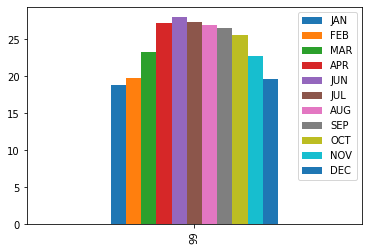

In [31]:
print('Select your operation:\n 1. Show Temperature Data\n 2. Show Rainfall Data\n 3. Predict Temperature Data\n 4. Predict Rainfall Data')
ans = int(input('Enter your choice: '))
print('\n')
if ans == 1:
    temp_show()
elif ans == 2:
    rain_show()
elif ans == 3:
    temp_predict()
elif ans == 4:
    rain_predict()
else:
    print('Invalid input')

In [ ]:
1